#Tarea 4

In [1]:
% pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fft
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Difracción de  Fraunhofer

**(a)**  *Pintar un cuadrado de 32x32*


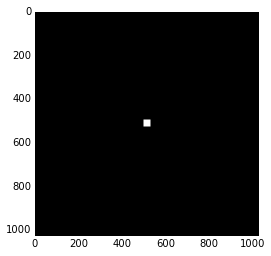

In [2]:
zerosArray=np.zeros((1024,1024))
# con el uso de slice notation hacemos el cuadrado de 32x32 
centro= len(zerosArray)/2 #para centrarlo se busca el centro de cada lado 
zerosArray[(centro-16):(centro + 16),(centro-16):(centro + 16)] = 1 # coloreamos el cuadrado
plt.imshow(zerosArray, cmap=cm.Greys_r)

**(b)** Patron de  interferencia en cuadro de 200x200

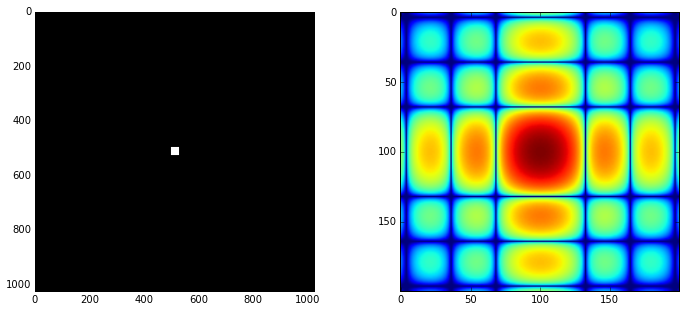

In [3]:
# transformada 
trans1=fft.fft2(zerosArray) 
w= fft.fftshift(trans1)
# Para clacular el espectro de potencia 2D
espectro1=np.abs(w)**2
fig2=plt.figure(figsize=(12,5))
ax1= fig2.add_subplot(121)
ax1.imshow(zerosArray, cmap=cm.Greys_r)
ax2 = fig2.add_subplot(122)
paraPlot=np.log10(espectro1[(centro-100):(centro + 100),(centro-100):(centro + 100)]+1) # Esta delimitado para cuadro 200x200
ax2.imshow(paraPlot)

**(c)**

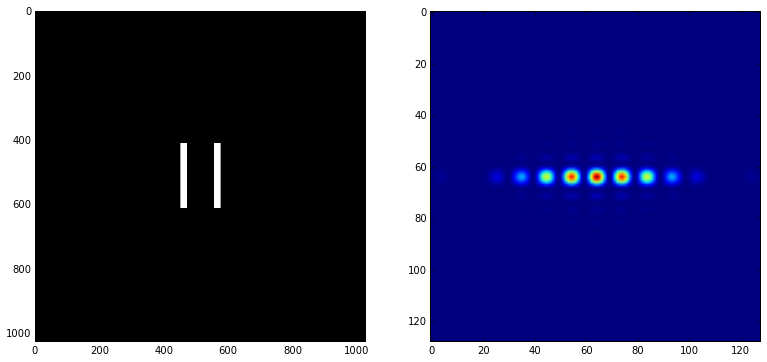

In [4]:
fig3=plt.figure(figsize=(13,6))

zerosArray2=np.zeros((1024,1024))
# con el uso de slice notation hacemos el cuadrado de 32x32 
centro= len(zerosArray2)/2 #para centrarlo se busca el centro de cada lado 
zerosArray2[(centro-100):(centro + 100),(460-10):(460+10)] = 1 # coloreamos la primera rendija con centro en 460
zerosArray2[(centro-100):(centro + 100),(564-10):(564+10)] = 1 # coloreamos la segnda rendija con centro en 564
ax1=fig3.add_subplot(121)
ax1.imshow(zerosArray2, cmap=cm.Greys_r)

# transformada 
trans2=fft.fft2(zerosArray2) 
w2= fft.fftshift(trans2)
# Para clacular el espectro de potencia 2D
espectro2=np.abs(w2)**2
ax2 = fig3.add_subplot(122)
paraPlot=espectro2[(centro - 64):(centro + 64),(centro - 64):(centro + 64)]
ax2.imshow(paraPlot)

**(d)**

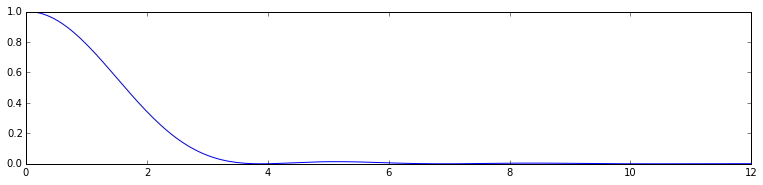

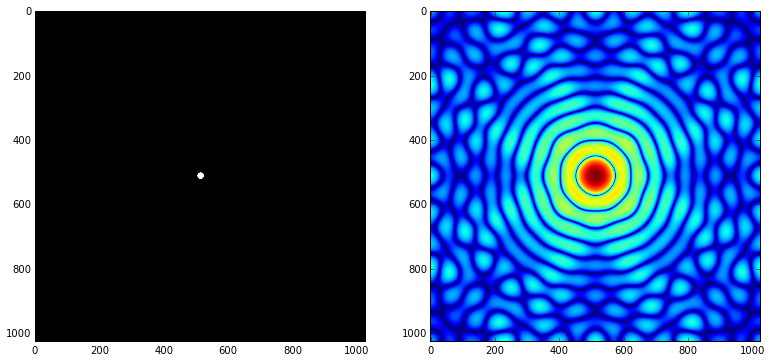

In [5]:
zerosArray3=np.zeros((1024,1024))
centro= len(zerosArray3)/2 #Centro del array

#  circulo de radio 0.01 u

r=len(zerosArray3)*0.01 # radio del circulo(punto) en entero aproxima por encima de .4
r_2= r**2

# para  empesar de x,y una grilla de 2r x 2r

for  i in range(int(centro-r-1),int(centro+r+2)):  #donde i,guarda la posición en x 
    for  k in range (int(centro-r-1),int(centro+r+2)):
        cuadrados= (i-512)**2 + (k-512)**2
        if cuadrados <= r_2:
            zerosArray3[i,k]=1
            
# transformada 
trans3=fft.fft2(zerosArray3) 
w3= fft.fftshift(trans3)

# Para calcular el espectro de potencia 2D
espectro3=np.abs(w3)**2
paraPlot=espectro3


fig5= plt.figure(figsize=(13,6))

X=2*np.pi*0.01/1.*linspace(-512,512,1024)
max_I=np.max(espectro3[512,:]) 

ax1 = fig5.add_subplot(211)
paraGraf=espectro3[512,:]/(max_I*1.0)
ax1.plot(X,paraGraf)
ax1.set_xlim([0,12]) 
ax1.set_ylim([0,1.])

fig4=plt.figure(figsize=(13,8))            
ax1=fig4.add_subplot(121)
ax1.imshow(zerosArray3, cmap=cm.Greys_r)

ax2 = fig4.add_subplot(122)
ax2.imshow(np.log(paraPlot+1)) 

plt.show()

**(e)**

(0, 1.1)

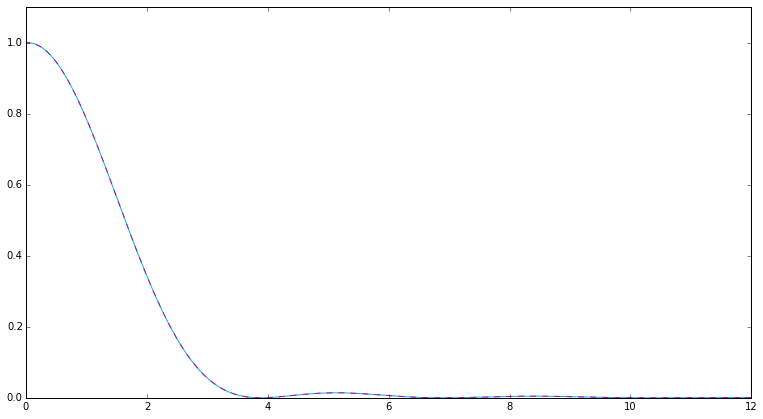

In [6]:
fig=plt.figure(figsize=(13,7))
ax=fig.add_subplot(111)
inter_cub= interpolate.interp1d(X, paraGraf ,kind='cubic')
ax.plot(X, inter_cub(X), c='c')
inter_qua= interpolate.interp1d(X, paraGraf ,kind='quadratic')
ax.plot(X, inter_qua(X), '--m')
ax.set_xlim([0,12])
ax.set_ylim([0,1.1])

**Usando la derivada:**

Evaluamos la derivada en un array de x pequeños y cuando esta valga 0 se imprime el valor de x 

In [7]:
# para la derivada
n=1200#  numero de  puntos
a=-0.5
b=12.0
x_x=np.linspace(a,b,n)
y=inter_qua(x_x)
h=(b-a)/n # tamaño del paso
yback=np.roll(y,-1)
ysig=np.roll(y,1)
deriv=(yback-ysig)/(2.*h)
deriv=deriv[1:-1] # ya  que  la prirea y ultima derivada  no son coherentes. 
x_x= x_x[1:-1]
iter_deriv =interpolate.interp1d(x_x, deriv ,kind='quadratic')

In [8]:
from scipy.optimize import bisect
extremos = [-0.1,3,5,6.5,8,9,11,11.8]
for i in range(len(extremos)-1):
    x_o=bisect(iter_deriv,extremos[i],extremos[i+1])
    y_o=inter_qua(x_o)
    print 'Optimo obtenido en x =',x_o,'con valor y =',round(y_o,4)

Optimo obtenido en x = 0.0314465698598 con valor y = 1.0
Optimo obtenido en x = 3.887443911 con valor y = 0.0
Optimo obtenido en x = 5.1290244628 con valor y = 0.0141
Optimo obtenido en x = 6.90032683785 con valor y = 0.0
Optimo obtenido en x = 8.37312155509 con valor y = 0.0046
Optimo obtenido en x = 10.2875049509 con valor y = 0.0
Optimo obtenido en x = 11.6555171792 con valor y = 0.001
